In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.



['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [3]:
print(df_train.columns)
print(df_test.columns)
print(df_train.shape, df_test.shape)
print(df_train.isnull().sum())

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
(15035, 21) (6468, 20)
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15    

In [4]:
for df in [df_train,df_test]:
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']    # 침실과 욕실의 총합.
    df['sqft_ratio'] = df['sqft_living'] / df['sqft_lot']   # 실제 주거 공간 + 토지 전체 공간
    df['sqft_total_size'] = df['sqft_living'] + df['sqft_lot'] + df['sqft_above'] + df['sqft_basement']  # 지하실 제외 집의 평방 피트, 집 지하실 포함.
    df['sqft_total15'] = df['sqft_living15'] + df['sqft_lot15']  # 2015년 거실, 2015년 lotSize영역 
    df['is_renovated'] = df['yr_renovated'] - df['yr_built']
    df['sqft_total_by_lot'] = (df['sqft_living'] + df['sqft_above'] + df['sqft_basement'])/df['sqft_lot']
    
    #qcut_count = 10
    #df['qcut_long'] = pd.qcut(df['long'], qcut_count, labels=range(qcut_count))
    #df['qcut_lat'] = pd.qcut(df['lat'], qcut_count, labels=range(qcut_count))

### 모델 만들기

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## 새로운 변수 생성
* total_rooms = bedrooms(침실)+bathrooms(욕실)
* sqft_ration = sqft_living(실제 주거공간)/sqft_lot(토지 전체 공간)
* 

In [6]:
y=df_train['price'] # 타깃
X=df_train.drop('price', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2, #default = 75:25
                                                      random_state=123 ) 

In [7]:
import matplotlib.pyplot as plt

In [8]:
X_train.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_rooms,sqft_ratio,sqft_total_size,sqft_total15,is_renovated,sqft_total_by_lot
id,1.000000,0.006633,0.101887,0.036486,-0.035993,0.184865,-0.010251,-0.023266,-0.099870,0.075386,0.069336,-0.054544,0.202818,-0.029249,-0.003839,0.000765,0.015386,0.026858,-0.036563,0.057502,0.209997,-0.034128,-0.035679,-0.043249,0.209997
bedrooms,0.006633,1.000000,0.530635,0.597978,0.037336,0.191151,-0.015202,0.081713,0.027835,0.371647,0.492559,0.319941,0.161442,0.022752,-0.165178,-0.005034,0.142852,0.408673,0.029709,0.895893,0.036780,0.062623,0.040119,0.010791,0.036780
bathrooms,0.101887,0.530635,1.000000,0.754412,0.089147,0.506871,0.071976,0.181959,-0.133634,0.667000,0.687070,0.279850,0.510785,0.063301,-0.211771,0.019056,0.236363,0.574243,0.093863,0.851955,0.292091,0.120695,0.108220,0.025610,0.292091
sqft_living,0.036486,0.597978,0.754412,1.000000,0.176094,0.362539,0.100830,0.270002,-0.057430,0.763434,0.878217,0.432263,0.321666,0.065410,-0.204696,0.055764,0.254042,0.763232,0.189258,0.764833,0.079830,0.217423,0.208005,0.041221,0.079830
sqft_lot,-0.035993,0.037336,0.089147,0.176094,1.000000,-0.000177,0.028040,0.084743,-0.005036,0.113525,0.185989,0.017027,0.056206,-0.000622,-0.125061,-0.074934,0.217027,0.148652,0.711592,0.069791,-0.251008,0.999112,0.711736,-0.004634,-0.251008
floors,0.184865,0.191151,0.506871,0.362539,-0.000177,1.000000,0.029344,0.024931,-0.267836,0.461026,0.528493,-0.239434,0.493940,0.008315,-0.057846,0.052585,0.130789,0.281901,-0.013950,0.383762,0.558991,0.015346,-0.006590,-0.027193,0.558991
waterfront,-0.010251,-0.015202,0.071976,0.100830,0.028040,0.029344,1.000000,0.389946,0.015895,0.088905,0.074024,0.070974,-0.029268,0.117496,0.026253,-0.018622,-0.040852,0.083148,0.030082,0.028335,-0.032014,0.032120,0.032075,0.117505,-0.032014
view,-0.023266,0.081713,0.181959,0.270002,0.084743,0.024931,0.389946,1.000000,0.050189,0.240075,0.160647,0.260900,-0.068171,0.118470,0.089061,0.005219,-0.076164,0.267518,0.085092,0.145853,-0.010048,0.095589,0.091565,0.121246,-0.010048
condition,-0.099870,0.027835,-0.133634,-0.057430,-0.005036,-0.267836,0.015895,0.050189,1.000000,-0.146595,-0.157987,0.177958,-0.366599,-0.064859,0.005359,-0.018530,-0.112294,-0.096173,-0.003017,-0.052849,-0.158539,-0.007452,-0.005487,-0.037462,-0.158539
grade,0.075386,0.371647,0.667000,0.763434,0.113525,0.461026,0.088905,0.240075,-0.146595,1.000000,0.759592,0.161949,0.444874,0.029993,-0.191949,0.117025,0.210032,0.719299,0.122966,0.579197,0.190193,0.145253,0.140922,-0.002388,0.190193


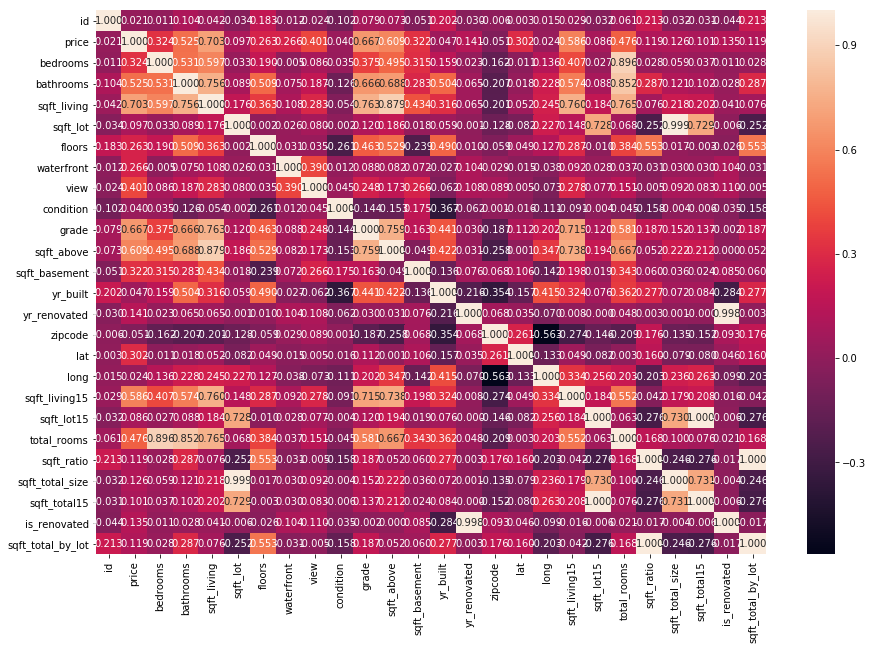

In [9]:
import seaborn as sns
corr=df_train.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.3f')

In [10]:
X_train.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'total_rooms', 'sqft_ratio',
       'sqft_total_size', 'sqft_total15', 'is_renovated', 'sqft_total_by_lot'],
      dtype='object')

#### 데이터 변수 선택

In [11]:
#sel = ['bedrooms', 'floors']
#sel = ['bedrooms', 'floors', 'grade', 'sqft_living'] # 2
#sel2 = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above',
#       'sqft_basement', 'yr_renovated','lat', 'sqft_living15'] #3
'''
X_train_sel = X_train[sel]
X_valid_sel = X_valid[sel]
X_test_sel = df_test[sel]
'''
#sel3
X_train_sel = X_train.drop('date', axis=1)
X_valid_sel = X_valid.drop('date' , axis=1)
X_test_sel=df_test.drop('date', axis=1)


In [12]:
## 01. 모델 생성, 02. 모델 훈련, 03. 예측
model = linear_model.LinearRegression() # 생성
model.fit(X_train_sel, y_train) # 훈련
val_pred1 = model.predict(X_valid_sel) # 예측
print(val_pred1.shape)

(3007,)


In [13]:
import lightgbm as lgb
from xgboost import XGBRegressor

In [14]:
## 01. 모델2. lgbm
lightgbm = lgb.LGBMRegressor(random_state=123)
lightgbm.fit(X_train_sel, y_train)
y_pred_lgbm = lightgbm.predict(X_valid_sel)

## 01. 모델3. xgbm
xgbm_model = XGBRegressor()
xgbm_model.fit(X_train_sel, y_train)
y_pred_xgbm = xgbm_model.predict(X_valid_sel)


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [15]:
## 모델 평가1
from math import sqrt
print('RMSE : ', sqrt(mean_squared_error(val_pred1, y_valid)))

RMSE :  222814.13041734192


In [16]:
## 모델 평가2
from math import sqrt
print('RMSE : ', sqrt(mean_squared_error(val_pred1, y_valid)))

RMSE :  222814.13041734192


In [17]:

print('RMSE : ', sqrt(mean_squared_error(val_pred1, y_valid)))

RMSE :  222814.13041734192


In [18]:
## 모델 평가4
from math import sqrt

print('RMSE : ', sqrt(mean_squared_error(val_pred1, y_valid)))
print('RMSE(lgbm) : ', sqrt(mean_squared_error(y_pred_lgbm, y_valid)))
print('TMSE(xgbm) : ', sqrt(mean_squared_error(y_pred_xgbm, y_valid)))

RMSE :  222814.13041734192
RMSE(lgbm) :  143373.13814836473
TMSE(xgbm) :  142316.6060813369


In [19]:
print(y_pred_xgbm.shape)

(3007,)


In [20]:
print(sum.shape)

AttributeError: 'builtin_function_or_method' object has no attribute 'shape'

In [21]:
## 01. 모델2. lgbm
lightgbm = lgb.LGBMRegressor(random_state=123)
lightgbm.fit(X_train_sel, y_train)
y_pred_lgbm = lightgbm.predict(X_test_sel)

## 01. 모델3. xgbm
xgbm_model = XGBRegressor()
xgbm_model.fit(X_train_sel, y_train)
y_pred_xgbm = xgbm_model.predict(X_test_sel)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [22]:
sum = pd.read_csv('../input/sample_submission.csv')
sum.head()
sum['price']=y_pred_xgbm
sum.head()

,id,price
0,15035,5.962102e+05
1,15036,3.758005e+05
2,15037,1.442022e+06
3,15038,3.204395e+05
4,15039,2.696918e+05


In [23]:
sum.to_csv('1stSub.csv', index=False)

## EDA

In [24]:
df_train.head(30)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_rooms,sqft_ratio,sqft_total_size,sqft_total15,is_renovated,sqft_total_by_lot
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4.00,0.208850,8010,6990,-1955,0.417699
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,3.00,0.077000,11540,10782,-1933,0.154000
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,5.00,0.207921,11440,9303,-1987,0.415842
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,5.25,0.251503,10249,9057,-1995,0.503006
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,4.50,0.109155,11831,11361,-1963,0.218309
5,5,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,5.50,0.363414,16916,11135,-1965,0.726827
6,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000,3.00,0.193333,8320,7330,-1942,0.386667
7,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,4.00,0.071856,22761,14477,-1927,0.143711
8,8,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,4.75,0.141529,12420,11578,-1977,0.283058
9,9,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,7.00,0.373196,8470,6210,-1900,0.746392


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


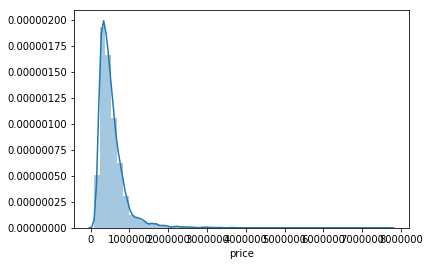

In [25]:
sns.distplot(df_train['price'])

ValueError: Could not interpret input ''

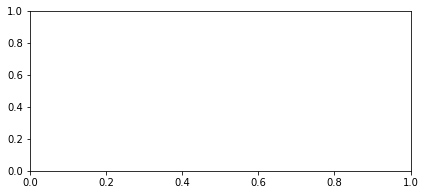

In [26]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.boxplot(x='')